In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("drive/MyDrive/Curso machine learning/Classificação/heart.csv", sep=',', encoding='iso-8859-1')

In [5]:
df.shape

(918, 12)

# Análise Exploratória

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Atributo Age


In [8]:
df['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

Histograma com a biblioteca plotly
https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html

In [9]:
histo1 = px.histogram(df, 'Age',nbins=70)
histo1.update_layout(width = 600, height = 500, title_text='Histograma do atributo Age')
histo1.show()


Histograma com a biblioteca searnborn
https://seaborn.pydata.org/generated/seaborn.histplot.html

<Axes: xlabel='Age', ylabel='Count'>

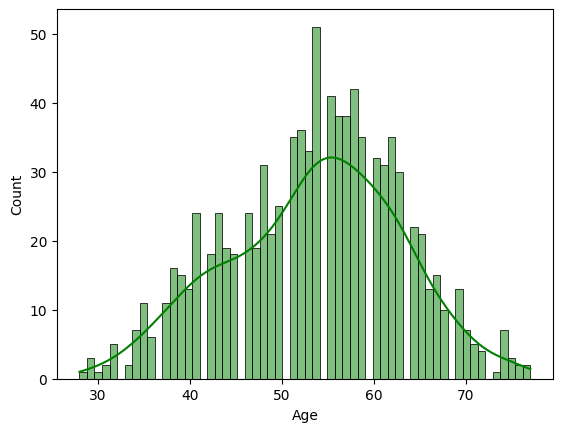

In [10]:
sns.histplot(df, x='Age', bins=60, color='green', kde=True, stat='count')

Atributo Sex

In [11]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

grafico de barras
https://seaborn.pydata.org/generated/seaborn.countplot.html

<Axes: xlabel='Sex', ylabel='count'>

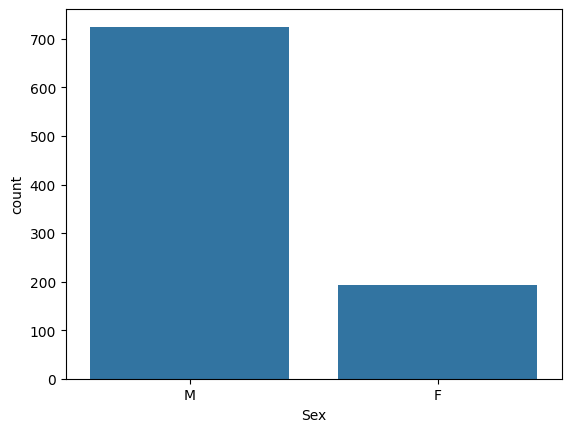

In [12]:
sns.countplot(df, x="Sex")

In [13]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Atributo ChestPainType // Tipo de dor no peito

ATA - Angina Típica Anginosa

NAP - Angina Atípica

ASY - Assintomático

TA - Angina Típica

In [14]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

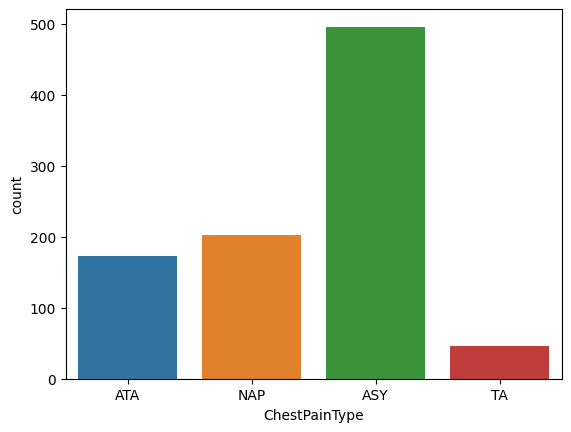

In [15]:
sns.countplot(df,x = 'ChestPainType', hue='ChestPainType',legend=False);

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Atributo RestingBP  (mm Hg)**

refere-se à pressão arterial em repouso de um indivíduo, um indicador essencial da saúde cardiovascular.

In [17]:
df['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164])

<Axes: xlabel='RestingBP', ylabel='Count'>

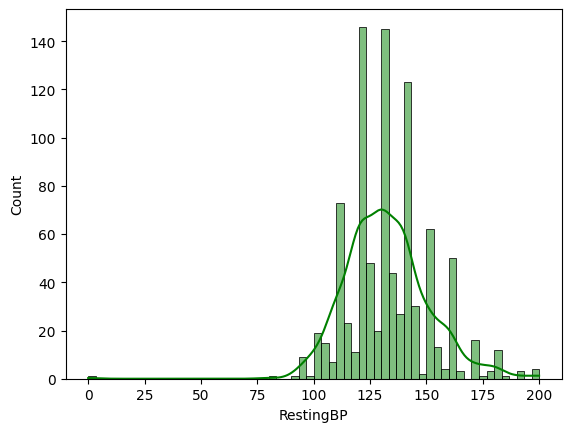

In [18]:
sns.histplot(df,x = 'RestingBP',bins=60,color='green',kde=True,stat='count')

In [19]:
df['RestingBP'].value_counts().sort_index()

#Pressão arterial 0?

RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64

**Atributo Cholesterol [mm/dl]**


In [20]:
df['Cholesterol'].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

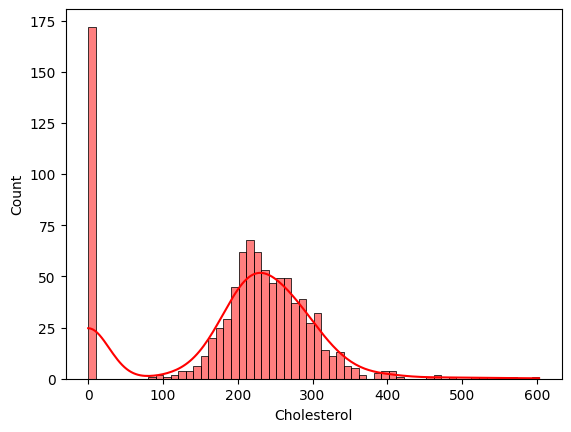

In [21]:
sns.histplot(df,x = 'Cholesterol', bins=60,color='red', kde=True,stat='count');

In [22]:
df['Cholesterol'].value_counts().sort_index()

#Colesterol 0??

Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64

**FastingBS [1: if FastingBS > 120 mg/dl, 0: otherwise]**

 Refere-se ao nível de glicose no sangue após um período de jejum, geralmente de 8 a 12 horas.

In [23]:
df['FastingBS'].unique()

array([0, 1])

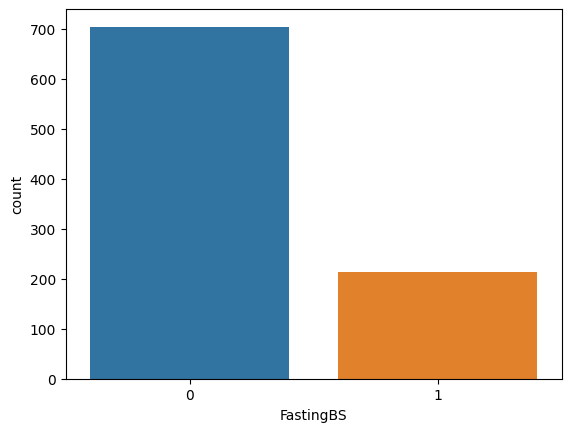

In [24]:
sns.countplot(df, x='FastingBS', hue='FastingBS' , legend=False);

**Atributo RestingECG**

Normal: Normal

ST: apresentando anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST de > 0.05 mV)

LVH: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes.



In [25]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

<Axes: xlabel='RestingECG', ylabel='count'>

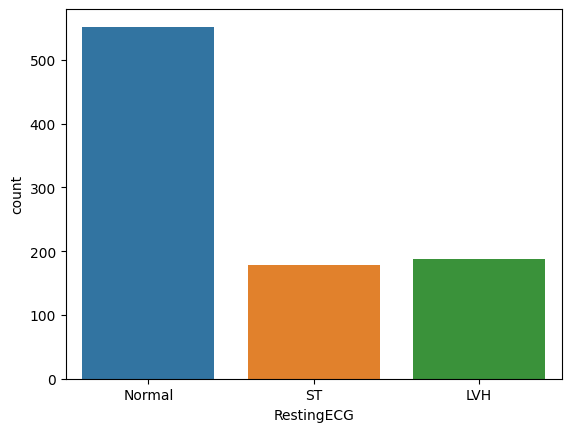

In [26]:
sns.countplot(df,x='RestingECG',hue='RestingECG',legend=False)

**Atributo MHR**

A frequência cardíaca máxima alcançada.








In [27]:
df['MaxHR'].unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202])

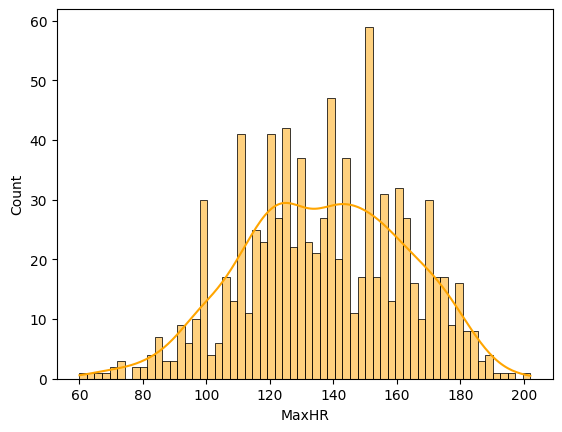

In [28]:
sns.histplot(df,x='MaxHR',bins=60,color='orange',kde=True,stat='count');

**Atributo ExerciseAngina**

Angina induzida pelo exercício.

Angina é o nome dado para a dor no peito causada pela diminuição do fluxo de sangue no coração,.








In [29]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

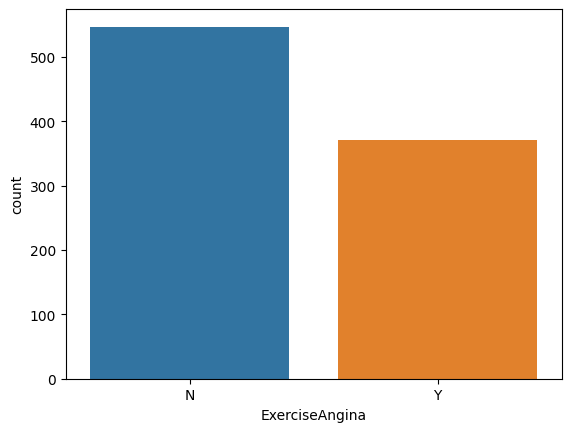

In [30]:
sns.countplot(df,x='ExerciseAngina',hue='ExerciseAngina',legend=False);

**Atributo Oldpeak**

https://www.google.com/search?sca_esv=697ef796fdf142b1&q=Oldpeak+values&tbm=isch&source=lnms&sa=X&ved=2ahUKEwjMmf6645CGAxW5r5UCHcteBtQQ0pQJegQIDBAB&biw=1280&bih=639&dpr=1#imgrc=br8s_yjU-TqSrM


In [31]:
df['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

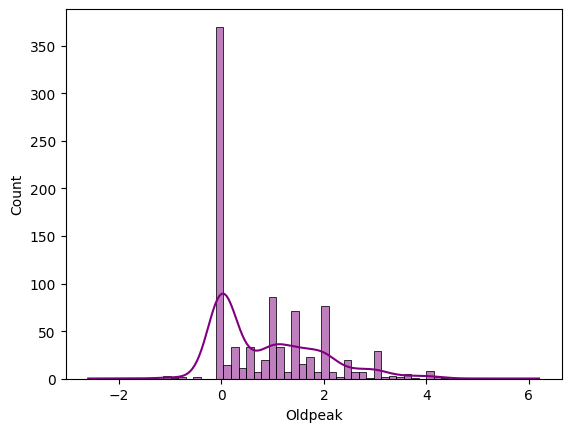

In [32]:
sns.histplot(df,x='Oldpeak',bins=60,color='purple',kde=True,stat='count');

In [33]:
df['Oldpeak'].value_counts().sort_index()

Oldpeak
-2.6      1
-2.0      1
-1.5      1
-1.1      1
-1.0      2
-0.9      1
-0.8      1
-0.7      1
-0.5      2
-0.1      2
 0.0    368
 0.1     14
 0.2     22
 0.3     11
 0.4     11
 0.5     19
 0.6     14
 0.7      7
 0.8     16
 0.9      4
 1.0     86
 1.1      7
 1.2     26
 1.3      7
 1.4     18
 1.5     53
 1.6     16
 1.7      6
 1.8     17
 1.9      7
 2.0     76
 2.1      2
 2.2      5
 2.3      2
 2.4      4
 2.5     16
 2.6      7
 2.8      7
 2.9      1
 3.0     28
 3.1      1
 3.2      2
 3.4      3
 3.5      2
 3.6      4
 3.7      1
 3.8      1
 4.0      8
 4.2      2
 4.4      1
 5.0      1
 5.6      1
 6.2      1
Name: count, dtype: int64

**Atributo ST_Slope**

se refere à inclinação do segmento ST durante o pico do exercício em um exame de estresse cardíaco ou em um eletrocardiograma

Up: em ascensão (upsloping)

Flat: plano (flat)

Down: em descida (downsloping)

In [34]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

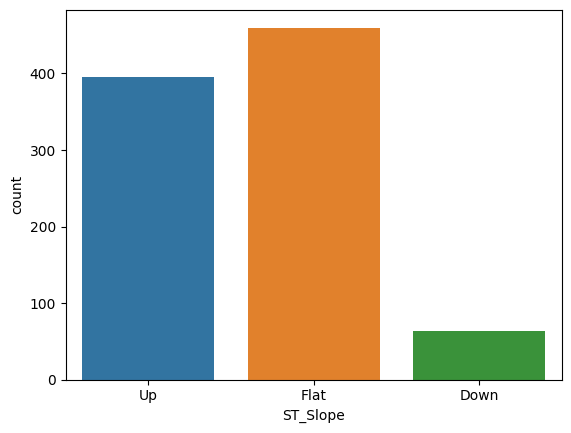

In [35]:
sns.countplot(df,x='ST_Slope',hue='ST_Slope',legend=False);

**Label HeartDisease**

1 se o paciente tem doença cardiaca

0 para paciente sem doença cardiaca

In [36]:
df['HeartDisease'].unique()

array([0, 1])

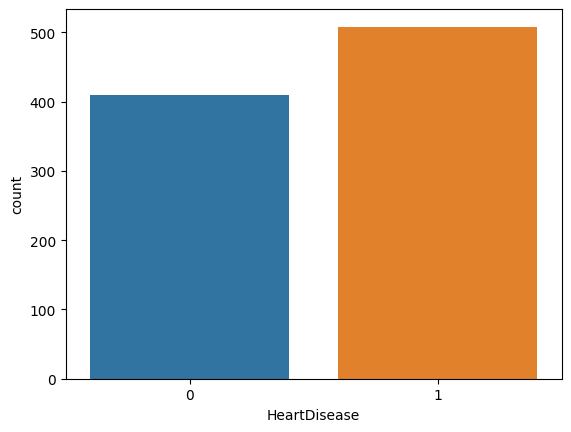

In [37]:
sns.countplot(df,x='HeartDisease',hue='HeartDisease',legend=False);

# Tratamento dos dados


Vereficando a Ausência de valores


In [38]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Caso ouvesse**

1- Excluir coluna do dado faltante.

2- Excluir instância que apresenta dado faltante.

3- Preencher com algum valor: (media,moda.....).

In [39]:
#Excluir valores faltante

df2 = df.dropna()

In [40]:
#Substituir Valores faltantes

df2['Age'].fillna(df2['Age'].mean(),inplace=True)

#Trata os valores com incoerentes
#boxplot
#Estudar distribuições

**Análise de valores incoerentes**



Atributos Pressão Arterial e Colesterol não podem assumir valores 0.



In [41]:
df['RestingBP'].value_counts().sort_index()

RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64

Como é só uma instância com valor 0, é conveniente a sua *exclusão*

In [42]:
df['RestingBP'].replace(0,np.NaN, inplace = True)

In [43]:
df= df.dropna()

In [44]:
df.shape

(917, 12)

*Atributo Colesterol*

In [45]:
df['Cholesterol'].value_counts().sort_index()

Cholesterol
0      171
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64

In [46]:
df['Cholesterol'].replace(0,np.NaN,inplace = True)

df['Cholesterol'].isnull().sum()

<ipython-input-46-7a5cb45ae0a1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



171

In [47]:
df['Cholesterol'].fillna(df['Cholesterol'].mean(),inplace = True)

In [48]:
df['Cholesterol'].isnull().sum()

0

In [49]:
df['Cholesterol'].value_counts().sort_values()

Cholesterol
131.000000      1
132.000000      1
337.000000      1
313.000000      1
141.000000      1
             ... 
230.000000      9
220.000000     10
223.000000     10
254.000000     11
244.635389    171
Name: count, Length: 222, dtype: int64

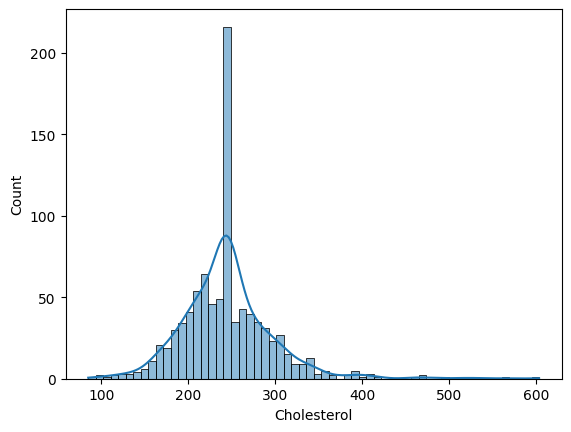

In [50]:
sns.histplot(df,x='Cholesterol',bins=60,kde=True,stat='count');

**Salvando o DataFrame com os dados Tratados**

In [54]:
df.to_csv('Heart_failure_tratado.csv',sep=';',encoding='utf-8',index =False)